<a href="https://colab.research.google.com/github/kelvinsima2/ECG_Classification/blob/main/ECG_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# In this project, the images are in google drive.
# Start by connecting to google drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
train_path = '/content/drive/My Drive/ECG Project/Data/ecg-data/ecg-data/mitbih_train.csv'
test_path = '/content/drive/My Drive/ECG Project/Data/ecg-data/ecg-data/mitbih_test.csv'


In [4]:
df_train = pd.read_csv(train_path, header = None)
df_test = pd.read_csv(test_path, header = None)

In [5]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df_train.shape

(87554, 188)

In [7]:
df_train_features, df_train_labels = df_train.iloc[:,:-1], df_train.iloc[:,[-1]]

In [8]:
df_train_labels[187].unique()

array([0., 1., 2., 3., 4.])

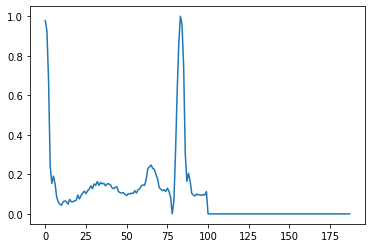

In [9]:
df_train.iloc[0].plot(kind = 'line')
plt.show()

In [10]:
class_1_indices = df_train_labels.index[df_train_labels[187] == 0].tolist()
class_2_indices = df_train_labels.index[df_train_labels[187] == 1].tolist()
class_3_indices = df_train_labels.index[df_train_labels[187] == 2].tolist()
class_4_indices = df_train_labels.index[df_train_labels[187] == 3].tolist()
class_5_indices = df_train_labels.index[df_train_labels[187] == 4].tolist()


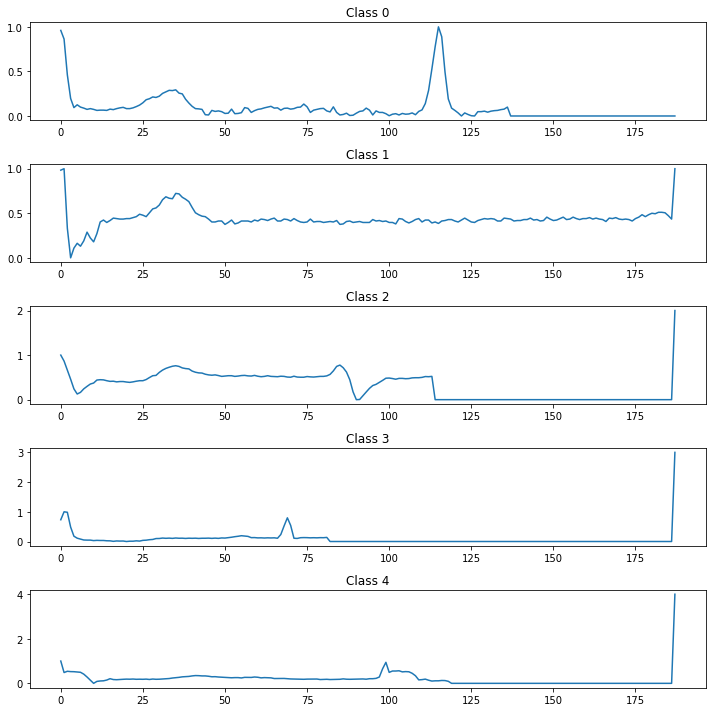

In [11]:
# Visualize examples of different ECG classes
fig, axs = plt.subplots(5, 1)
axs[0].plot(df_train.iloc[class_1_indices[1]])
axs[0].set_title('Class 0')
axs[1].plot(df_train.iloc[class_2_indices[1]])
axs[1].set_title('Class 1')
axs[2].plot(df_train.iloc[class_3_indices[1]])
axs[2].set_title('Class 2')
axs[3].plot(df_train.iloc[class_4_indices[1]])
axs[3].set_title('Class 3')
axs[4].plot(df_train.iloc[class_5_indices[1]])
axs[4].set_title('Class 4')
fig.set_figheight(10)
fig.set_figwidth(10)
fig.tight_layout()


# Sample Dataset

In [77]:
# Stratified sampling of 200 datapoints per class
# rng = np.random.default_rng(100)
# rints_0 = rng.integers(low = 0, high = max(class_1_indices), size = 200)
# rints_1 = rng.integers(low = 0, high = max(class_2_indices), size = 200)
# rints_2 = rng.integers(low = 0, high = max(class_3_indices), size = 200)
# rints_3 = rng.integers(low = 0, high = max(class_4_indices), size = 200)
# rints_4 = rng.integers(low = 0, high = max(class_5_indices), size = 200)


# rints_0 in class_1_indices

df_0 = df_train_features.iloc[class_1_indices]
df_1 = df_train_features.iloc[class_2_indices]
df_2 = df_train_features.iloc[class_3_indices]
df_3 = df_train_features.iloc[class_4_indices]
df_4 = df_train_features.iloc[class_5_indices]

sample_size = 400
df_0_sampled = df_0.sample(n = sample_size)
df_1_sampled = df_1.sample(n = sample_size)
df_2_sampled = df_2.sample(n= sample_size)
df_3_sampled = df_3.sample(n = sample_size)
df_4_sampled = df_4.sample(n = sample_size)  

df_sampled = pd.concat([df_0_sampled, df_1_sampled, df_2_sampled, df_3_sampled, df_4_sampled], axis = 0)


In [78]:
df_sampled.head()

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
61298,1.000000,0.968386,0.577371,0.425957,0.366057,0.329451,0.267887,0.231281,0.191348,0.156406,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55180,0.982716,0.740741,0.123457,0.076543,0.054321,0.007407,0.024691,0.000000,0.014815,0.061728,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68418,1.000000,0.870536,0.397321,0.205357,0.147321,0.120536,0.075893,0.044643,0.035714,0.026786,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33606,1.000000,0.900000,0.548889,0.271111,0.200000,0.186667,0.133333,0.137778,0.131111,0.115556,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37831,0.985030,0.779940,0.351796,0.032934,0.000000,0.094311,0.116766,0.101796,0.094311,0.097305,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
sampled_indices = df_sampled.index.to_list()

In [80]:
df_sampled_labels = df_train_labels.iloc[sampled_indices]

In [81]:
df_sampled_labels[187].unique()

array([0., 1., 2., 3., 4.])

# Converting ECG Signals to Wavelets

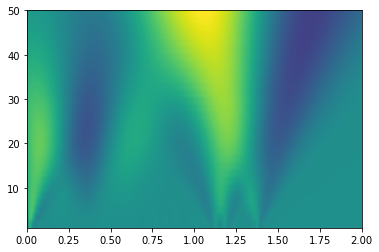

In [17]:
from scipy import signal

sample = df_train_features.iloc[class_3_indices[3]].to_numpy()
frequency = 125

t = np.linspace(0, 0.01, 2, endpoint=False)
widths = np.arange(1, 31)
cwtmatr = signal.cwt(sample, signal.ricker, widths)

cwtmatr_yflip = np.flipud(cwtmatr)
plt.imshow(cwtmatr_yflip,extent=[0, 2, 1, 50], cmap='viridis', aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.show()

In [82]:
def make_cwts(row):
  sample = row.to_numpy()
  widths = np.arange(1,31)
  cwtmatr = signal.cwt(sample, signal.ricker, widths)
  cwtmatr_yflip = np.flipud(cwtmatr)
  return cwtmatr_yflip

  


In [83]:
output_dir = '/content/drive/My Drive/ECG Project/Output/'

In [84]:
from tqdm.auto import tqdm#
import os
SIZE = 256
BATCH_SIZE = 32
for row in tqdm(sampled_indices):
        current_row = df_sampled.loc[row]
        target_dir = 'class_' +  str(int(df_sampled_labels.loc[row].values))            
        dist_dir = os.path.join(output_dir, target_dir)
        file_dist_path = os.path.join(dist_dir, str(row))
        if not os.path.exists(file_dist_path + '.png'):
            if not os.path.exists(dist_dir):
                os.mkdir(dist_dir)                
            cwtmatr_yflip = make_cwts(df_sampled.loc[row])

            fig = plt.subplots(figsize=(8, 7))
            img = plt.imshow(cwtmatr_yflip,extent=[0, 2, 1, 50], cmap='viridis', aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
            plt.axis('off')
            plt.savefig(f'{file_dist_path}.png')
            plt.close()

            
          

  0%|          | 0/2000 [00:00<?, ?it/s]

In [85]:
import tensorflow as tf
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
                                             batch_size=BATCH_SIZE,
                                             validation_split=0.2,
                                             directory=output_dir,
                                             shuffle=True,
                                             color_mode='rgb',
                                             image_size=(SIZE, SIZE),
                                             subset="training",
                                             seed=0,
                                             label_mode = 'categorical');

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
                                             batch_size=BATCH_SIZE,
                                             validation_split=0.2,
                                             directory=output_dir,
                                             shuffle=True,
                                             color_mode='rgb',
                                             image_size=(SIZE, SIZE),
                                             subset="validation",
                                             seed=0,
                                             label_mode = 'categorical');

Found 2000 files belonging to 5 classes.
Using 1600 files for training.
Found 2000 files belonging to 5 classes.
Using 400 files for validation.


In [86]:
# Obtain class names from training data. It is worth noting that they are presented in alphabetical order. This is useful during model testing.
class_names = train_dataset.class_names


In [87]:
# Display shape of training set
train_dataset.element_spec

(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))

In [88]:
val_batches = tf.data.experimental.cardinality(validation_dataset)
test_dataset = validation_dataset.take(val_batches // 5)
validation_dataset = validation_dataset.skip(val_batches // 5)

In [89]:
print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

Number of validation batches: 11
Number of test batches: 2


In [90]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

# Model Development and Evaluation

In [91]:
# Use the resnet_v2 preprocessing function to rescale pixel values
preprocess_input = tf.keras.applications.inception_v3.preprocess_input

In [92]:
# Create the base model from the pre-trained model MobileNet V2
IMG_SIZE = (256, 256)
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.inception_v3.InceptionV3(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

# For freezing the layer we make use of layer.trainable = False
# means that its internal state will not change during training.
# model's trainable weights will not be updated during fit(),
# and also its state updates will not run.
base_model.trainable=False

# Create Tensorflow functional model
inputs = tf.keras.Input(shape=IMG_SHAPE)
x = preprocess_input(inputs)
x = base_model(x, training=False)
x = tf.keras.layers.BatchNormalization(renorm=True)(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.6)(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
# The output layer has 5 outputs representing the number of classes in the image dataset.
outputs = tf.keras.layers.Dense(5, activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)

In [93]:
# categorical cross entropy is taken since its used as a loss function for
# multi-class classification problems where there are two or more output labels.
# using Adam optimizer for better performance
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [94]:
# Get model summary
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 256, 256, 3)]     0         
                                                                 
 tf.math.truediv_6 (TFOpLamb  (None, 256, 256, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_6 (TFOpLam  (None, 256, 256, 3)      0         
 bda)                                                            
                                                                 
 inception_v3 (Functional)   (None, 6, 6, 2048)        21802784  
                                                                 
 batch_normalization_664 (Ba  (None, 6, 6, 2048)       14336     
 tchNormalization)                                               
                                                           

In [95]:
# early stopping call back
early = tf.keras.callbacks.EarlyStopping( patience=10,
                                          min_delta=0.001,
                                          restore_best_weights=True)

In [96]:
# Train model using GPU
with tf.device('/device:GPU:0'):
  history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=validation_dataset,
                    callbacks = [early])

Epoch 1/10
50/50 [==============================] - 15s 182ms/step - loss: 1.1842 - accuracy: 0.5131 - val_loss: 0.7472 - val_accuracy: 0.7321
Epoch 2/10
50/50 [==============================] - 8s 138ms/step - loss: 0.7149 - accuracy: 0.7412 - val_loss: 0.5025 - val_accuracy: 0.8155
Epoch 3/10
50/50 [==============================] - 7s 137ms/step - loss: 0.5418 - accuracy: 0.8100 - val_loss: 0.4255 - val_accuracy: 0.8601
Epoch 4/10
50/50 [==============================] - 7s 133ms/step - loss: 0.4384 - accuracy: 0.8444 - val_loss: 0.4043 - val_accuracy: 0.8690
Epoch 5/10
50/50 [==============================] - 8s 139ms/step - loss: 0.3776 - accuracy: 0.8594 - val_loss: 0.3725 - val_accuracy: 0.8720
Epoch 6/10
50/50 [==============================] - 7s 134ms/step - loss: 0.3026 - accuracy: 0.8875 - val_loss: 0.3110 - val_accuracy: 0.8899
Epoch 7/10
50/50 [==============================] - 8s 142ms/step - loss: 0.2480 - accuracy: 0.9150 - val_loss: 0.3675 - val_accuracy: 0.8899
Epoch

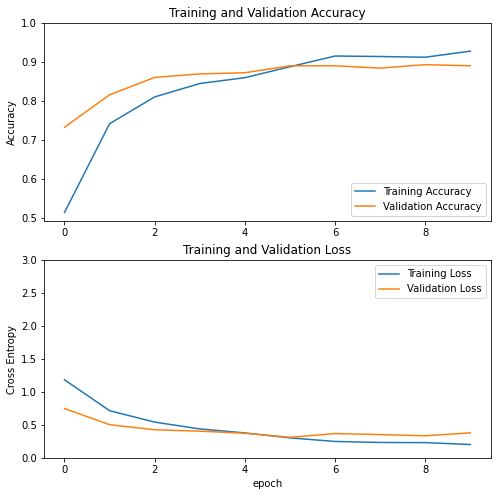

In [97]:
# Plot accuracy and loss graphs
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,3.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [98]:
# Evaluate model on test set
test_loss, test_accuracy = model.evaluate(test_dataset)

2/2 [==============================] - 1s 106ms/step - loss: 0.1916 - accuracy: 0.9531
